Loading Libraries and Data

In [190]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pickle

In [191]:
data=pd.read_csv(r"calories.csv")

Data.EXP

In [192]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [193]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Visualiz missing values

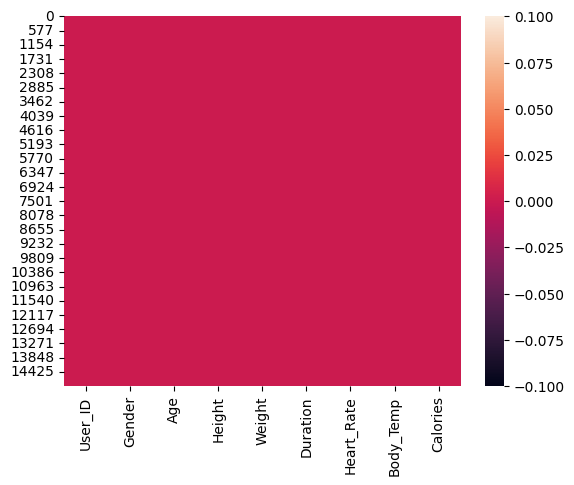

In [195]:
sns.heatmap(data.isnull())
data=data.drop(["User_ID"] , axis=1)

Data Visualization 

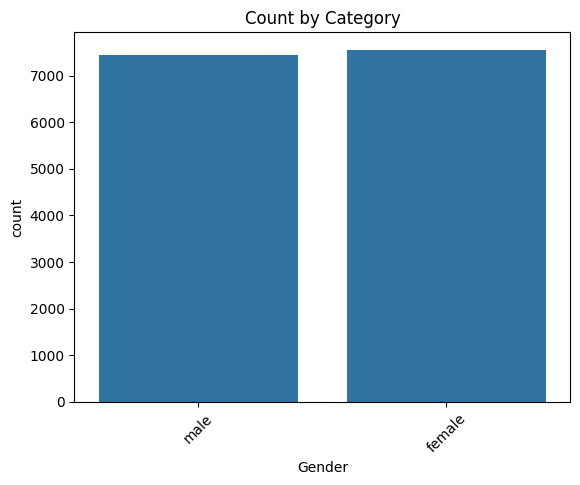

In [196]:
sns.countplot(x='Gender', data=data)
plt.title("Count by Category"); plt.xticks(rotation=45); plt.show()

<Axes: xlabel='Calories', ylabel='Count'>

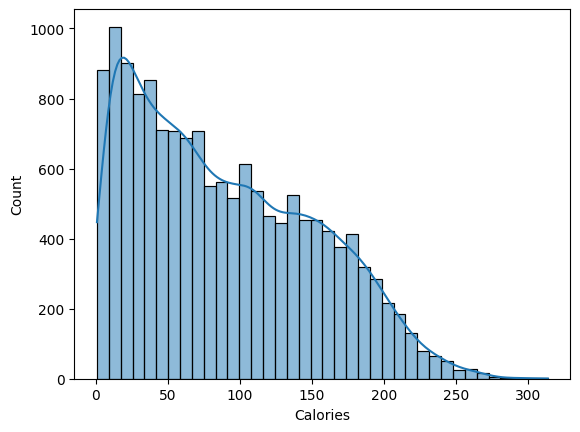

In [197]:
sns.histplot(data["Calories"], kde=True)

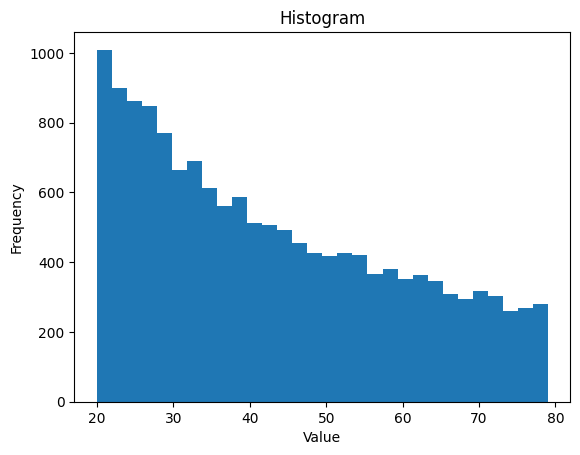

In [198]:
plt.hist(data['Age'], bins=30)
plt.xlabel("Value"); plt.ylabel("Frequency"); plt.title("Histogram"); plt.show()

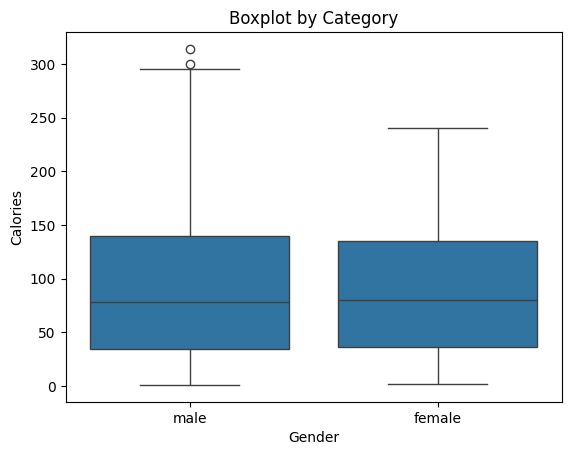

In [199]:
sns.boxplot(x="Gender", y="Calories", data=data)
plt.title("Boxplot by Category"); plt.show()

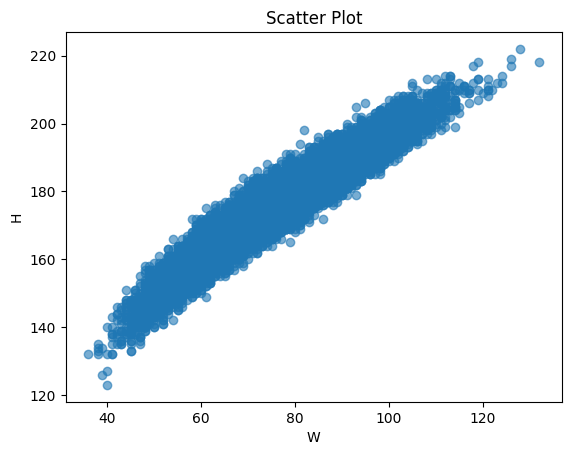

In [200]:
plt.scatter(data['Weight'], data['Height'], alpha=0.6)
plt.xlabel("W"); plt.ylabel("H"); plt.title("Scatter Plot"); plt.show()

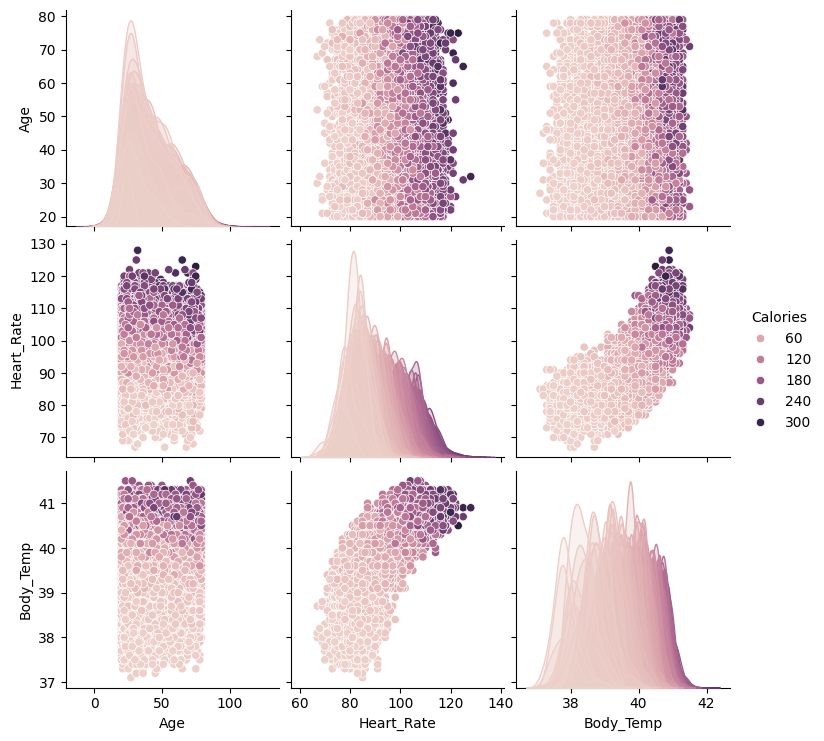

In [201]:
sns.pairplot(data[['Age','Heart_Rate','Body_Temp','Calories']], hue='Calories')
plt.show()

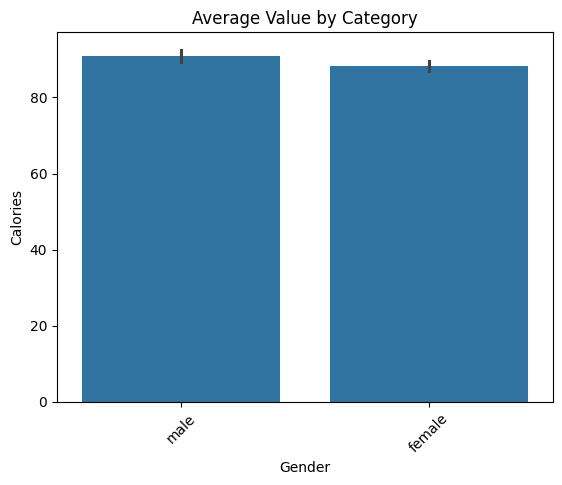

In [202]:
sns.barplot(x='Gender', y='Calories', data=data, estimator=np.mean)
plt.title("Average Value by Category"); plt.xticks(rotation=45); plt.show()

In [203]:
data["Gender"]=data["Gender"].replace(
    {
     "female":0,
     "male":1   
        
    }
)

D:\Temp\ipykernel_10060\760844809.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"]=data["Gender"].replace(


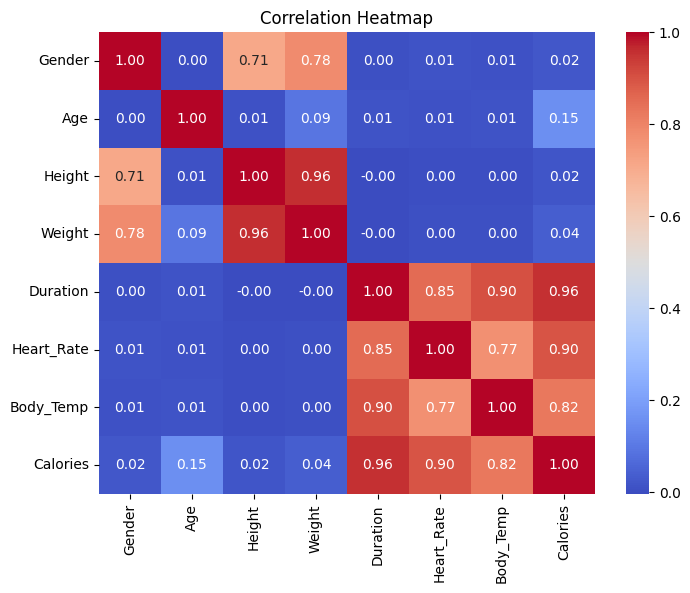

In [204]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Data PreProcessing

In [205]:
y=data["Calories"]
x=data.drop(["Calories"] , axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train , x_test , y_train , y_test =model_selection.train_test_split(x ,y , test_size=0.2,random_state=42 )


In [206]:

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(
          criterion="squared_error", 
    splitter="best",           
    max_depth=10,                
    min_samples_split=20,     
    min_samples_leaf=10,         
    max_features=None,           
    random_state=42),
    "Random Forest": RandomForestRegressor(
        
        n_estimators=500,       
    max_depth=6,             
    min_samples_split=50,   
    min_samples_leaf=20,    
    max_features=0.3,        
    random_state=42),
    "Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring="r2")
    print(f"{name} CV R² scores: {scores}")
    print(f"{name} Mean R²: {scores.mean():.3f}")
    print("-"*50)



Linear Regression CV R² scores: [0.96712832 0.96658977 0.96769213 0.96828562 0.96606908]
Linear Regression Mean R²: 0.967
--------------------------------------------------
Decision Tree CV R² scores: [0.99019589 0.99013882 0.99101642 0.9901274  0.99091448]
Decision Tree Mean R²: 0.990
--------------------------------------------------
Random Forest CV R² scores: [0.97707368 0.97925924 0.97940348 0.97866324 0.97690073]
Random Forest Mean R²: 0.978
--------------------------------------------------
Gradient Boosting CV R² scores: [0.9965265  0.99661233 0.99665391 0.99645175 0.9962608 ]
Gradient Boosting Mean R²: 0.997
--------------------------------------------------


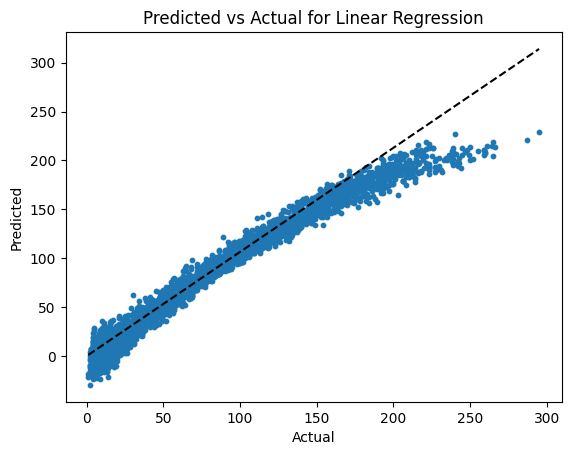

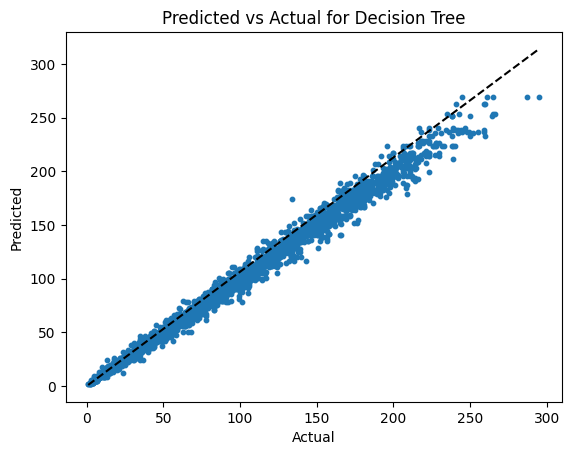

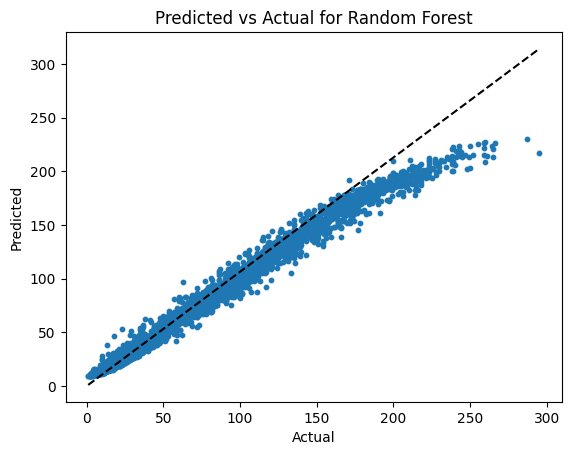

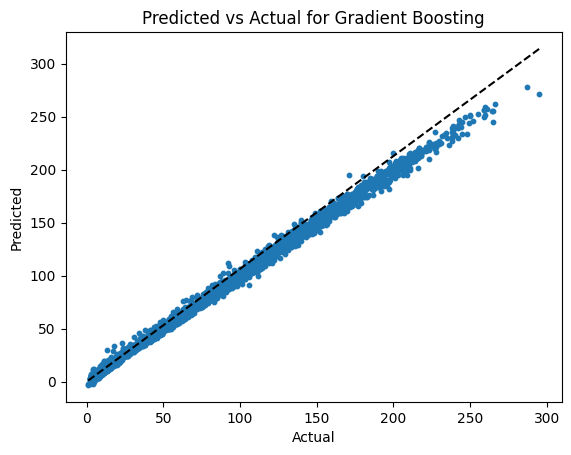

In [207]:
for name, model in models.items():
    model.fit(x_train , y_train)
    yr_pred = model.predict(x_test)
    plt.scatter(y_test, yr_pred, s=10)
    plt.plot([y_test.min(), y_test.max()], [y_train.min(), y_train.max()], 'k--')
    plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title(f'Predicted vs Actual for {name}'); plt.show()

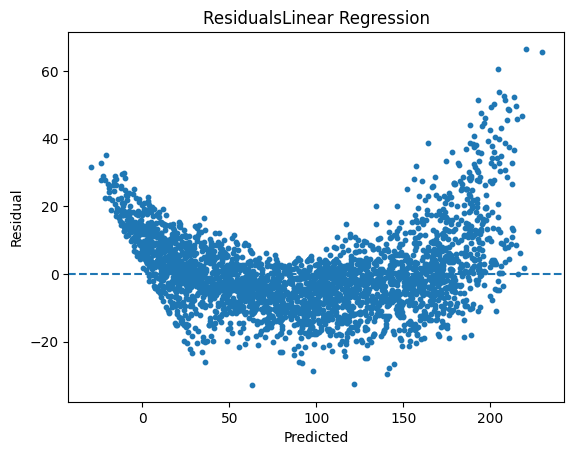

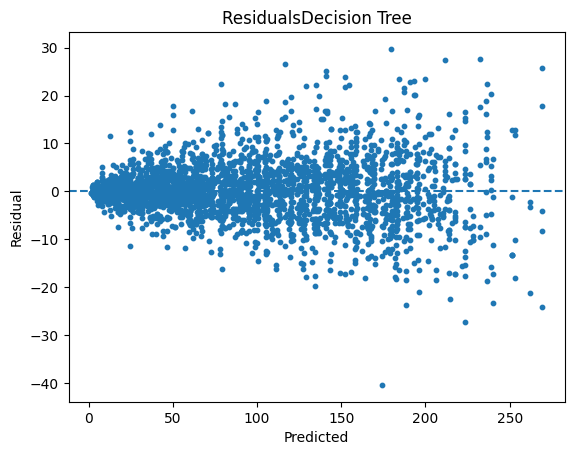

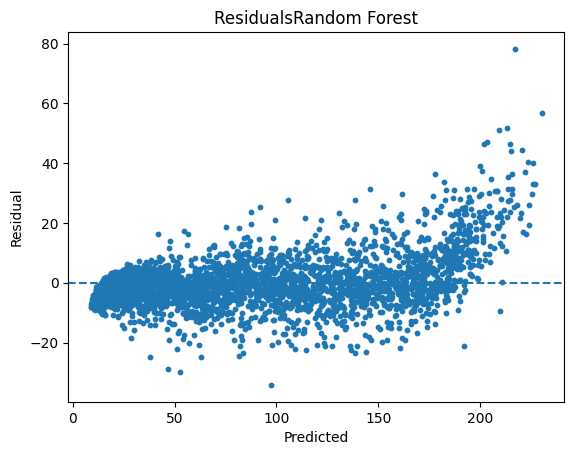

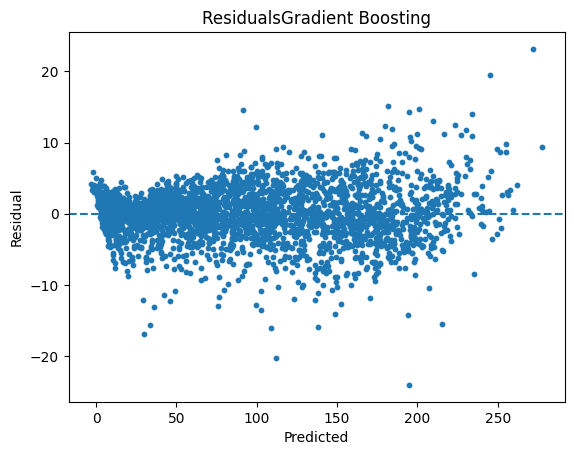

In [208]:
    
for name, model in models.items():
    model.fit(x_train , y_train)
    yr_pred = model.predict(x_test)
    resid = y_test - yr_pred
    plt.scatter(yr_pred, resid, s=10)
    plt.axhline(0, linestyle='--')
    plt.xlabel('Predicted'); plt.ylabel('Residual'); plt.title(f'Residuals{name}'); plt.show()
    

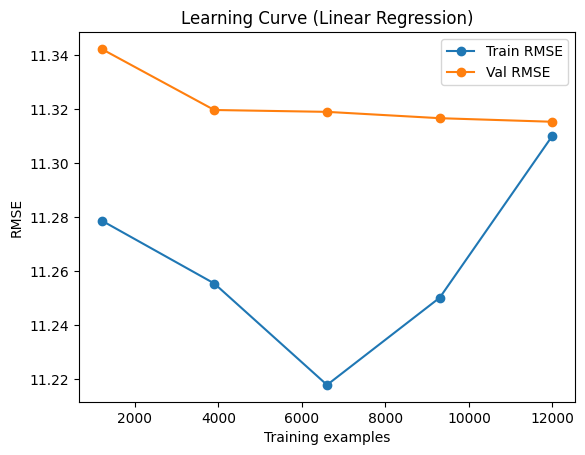

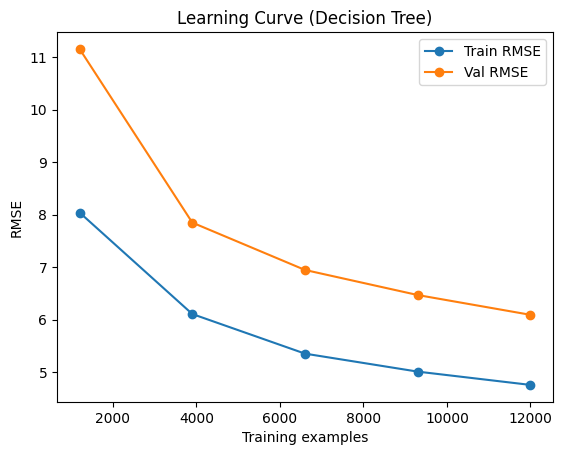

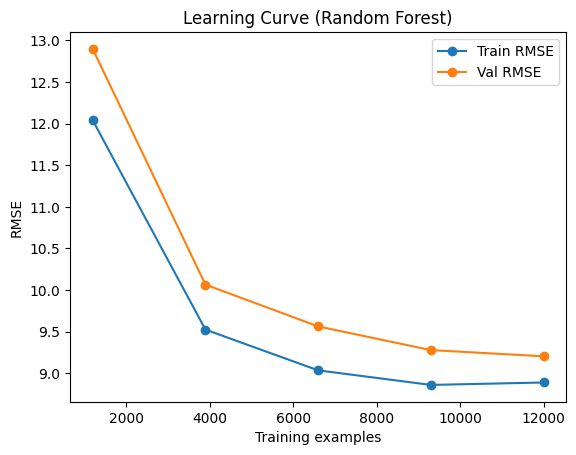

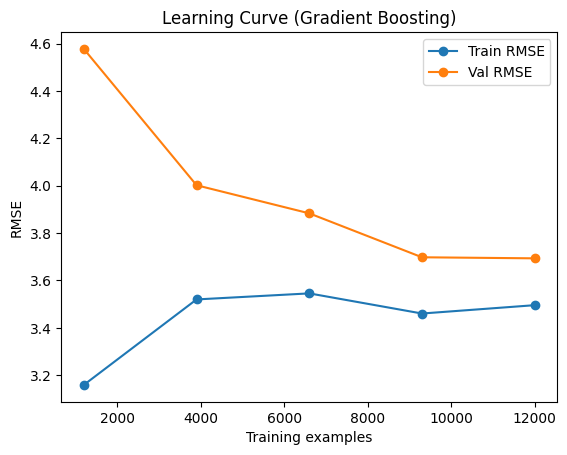

In [209]:
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
    
for name, model in models.items():
    train_sizes, train_scores, val_scores = learning_curve(
        model, x, y, cv=5, scoring='neg_root_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1)
    plt.plot(train_sizes, -train_scores.mean(axis=1), marker='o', label='Train RMSE')
    plt.plot(train_sizes, -val_scores.mean(axis=1), marker='o', label='Val RMSE')
    plt.xlabel('Training examples'); plt.ylabel('RMSE'); plt.title(f'Learning Curve ({name})'); plt.legend(); plt.show()

RandomForestRegressor is the best model 


In [211]:
import joblib
best_model = RandomForestRegressor()
best_model.fit(x_train , y_train)
joblib.dump(best_model, "Calories_model1.pkl")
joblib.dump(scaler, "scaler1.pkl")



['scaler1.pkl']